# Principal Component Analysis

PCA falls under the topic of dimensionality reduction in which we try to reduce the number of dimensions (number of features) in our dataset by projecting our dataset into a lower dimensional space. This is helpful for several reasons. 

1. Removing features helps alieve overfitting to a certain degree.
2. Less dimensions allow for faster computational speed and shorter training times.
3. Removing dimensions requires less storage space for the data.

Some features of high dimensional data may not offer much more useful information because usually there are underlying correlations between features. For example with cars we can say that usually more powerful cars (with more cylinders) usually have a smaller mpg (miles per gallon). So both these features together don't bring much newer information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(linewidth=500, precision=3)

In [2]:
df = pd.read_csv('data/mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
try:
    df = df.rename(columns={'Unnamed: 0': 'car'}).set_index('car')
except:
    pass

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data = df.values
data.shape, data

((32, 11),
 array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,   0.   ,   1.   ,   4.   ,   4.   ],
        [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,   0.   ,   1.   ,   4.   ,   4.   ],
        [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,   1.   ,   1.   ,   4.   ,   1.   ],
        [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,   1.   ,   0.   ,   3.   ,   1.   ],
        [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,   0.   ,   0.   ,   3.   ,   2.   ],
        [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,   1.   ,   0.   ,   3.   ,   1.   ],
        [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,   0.   ,   0.   ,   3.   ,   4.   ],
        [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,   1.   ,   0.   ,   4.   ,   2.   ],
        [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,   1.   ,   0.   ,   4.   ,   2.   ],
        

In [5]:
corr = df.corr()
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


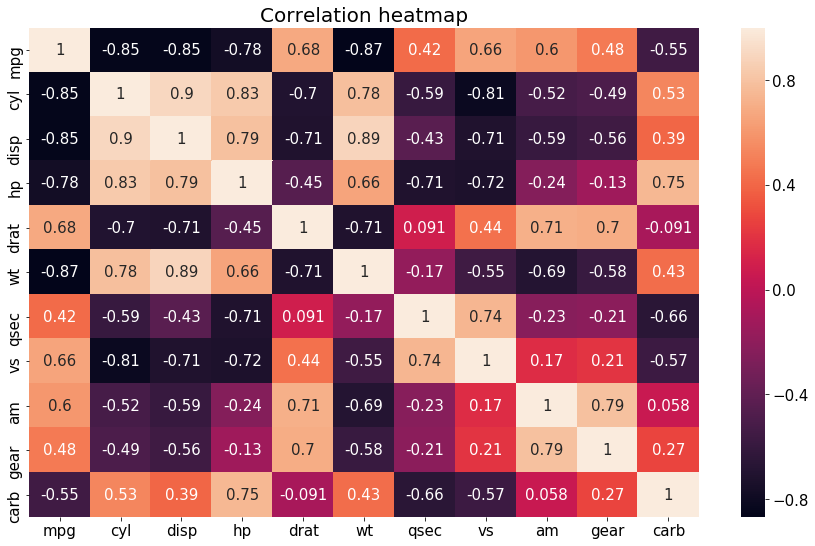

In [6]:
mpl.rcParams['font.size'] = 15

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap', fontsize=20);

In [7]:
eig_vals, eig_vecs = np.linalg.eig(corr)
len(eig_vals), eig_vecs.shape

(11, (11, 11))

In [8]:
print(eig_vals, '\n')
print(eig_vecs)

[6.608 2.65  0.627 0.022 0.052 0.077 0.123 0.135 0.27  0.223 0.212] 

[[ 0.363 -0.016  0.226  0.125  0.139  0.236  0.754 -0.368 -0.023  0.103  0.109]
 [-0.374 -0.044  0.175  0.141 -0.846  0.054  0.231 -0.057 -0.003  0.058 -0.169]
 [-0.368  0.049  0.061 -0.661  0.049  0.198 -0.001 -0.214  0.257  0.394  0.336]
 [-0.33  -0.249 -0.14   0.256  0.248 -0.576  0.222  0.001 -0.068  0.54  -0.071]
 [ 0.294 -0.275 -0.161  0.04  -0.101 -0.047 -0.032 -0.021  0.855  0.077 -0.244]
 [-0.346  0.143 -0.342  0.567  0.094  0.359  0.009  0.021  0.246 -0.075  0.465]
 [ 0.2    0.463 -0.403 -0.181 -0.271 -0.528  0.232 -0.05   0.068 -0.165  0.33 ]
 [ 0.307  0.232 -0.429 -0.008 -0.159  0.359 -0.026  0.266 -0.215  0.6   -0.194]
 [ 0.235 -0.429  0.206 -0.03  -0.178 -0.047  0.06   0.587 -0.03   0.09   0.571]
 [ 0.207 -0.462 -0.29   0.054 -0.214 -0.002 -0.336 -0.605 -0.265  0.048  0.244]
 [-0.214 -0.414 -0.529 -0.32   0.072  0.171  0.396  0.175 -0.127 -0.361 -0.184]]


In [9]:
sorted_indices = eig_vals.argsort()[::-1]

eig_vecs = eig_vecs[:,sorted_indices]
eig_vals = eig_vals[sorted_indices]

print(eig_vals, '\n')
print(eig_vecs)

[6.608 2.65  0.627 0.27  0.223 0.212 0.135 0.123 0.077 0.052 0.022] 

[[ 0.363 -0.016  0.226 -0.023  0.103  0.109 -0.368  0.754  0.236  0.139  0.125]
 [-0.374 -0.044  0.175 -0.003  0.058 -0.169 -0.057  0.231  0.054 -0.846  0.141]
 [-0.368  0.049  0.061  0.257  0.394  0.336 -0.214 -0.001  0.198  0.049 -0.661]
 [-0.33  -0.249 -0.14  -0.068  0.54  -0.071  0.001  0.222 -0.576  0.248  0.256]
 [ 0.294 -0.275 -0.161  0.855  0.077 -0.244 -0.021 -0.032 -0.047 -0.101  0.04 ]
 [-0.346  0.143 -0.342  0.246 -0.075  0.465  0.021  0.009  0.359  0.094  0.567]
 [ 0.2    0.463 -0.403  0.068 -0.165  0.33  -0.05   0.232 -0.528 -0.271 -0.181]
 [ 0.307  0.232 -0.429 -0.215  0.6   -0.194  0.266 -0.026  0.359 -0.159 -0.008]
 [ 0.235 -0.429  0.206 -0.03   0.09   0.571  0.587  0.06  -0.047 -0.178 -0.03 ]
 [ 0.207 -0.462 -0.29  -0.265  0.048  0.244 -0.605 -0.336 -0.002 -0.214  0.054]
 [-0.214 -0.414 -0.529 -0.127 -0.361 -0.184  0.175  0.396  0.171  0.072 -0.32 ]]


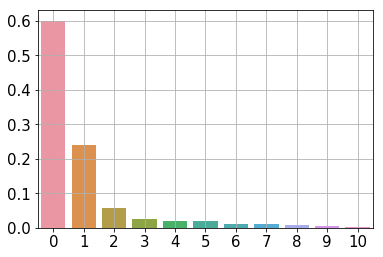

In [10]:
sns.barplot(x=np.arange(len(eig_vals)), y=eig_vals / eig_vals.sum())
plt.grid();

In [11]:
cumulative = (eig_vals / eig_vals.sum()).cumsum()
cumulative

array([0.601, 0.842, 0.899, 0.923, 0.944, 0.963, 0.975, 0.986, 0.993, 0.998, 1.   ])

In [12]:
i = np.argwhere((cumulative > 0.9))[0,0]
i

3

In [13]:
W = eig_vecs[:,:i+1].copy()
W

array([[ 0.363, -0.016,  0.226, -0.023],
       [-0.374, -0.044,  0.175, -0.003],
       [-0.368,  0.049,  0.061,  0.257],
       [-0.33 , -0.249, -0.14 , -0.068],
       [ 0.294, -0.275, -0.161,  0.855],
       [-0.346,  0.143, -0.342,  0.246],
       [ 0.2  ,  0.463, -0.403,  0.068],
       [ 0.307,  0.232, -0.429, -0.215],
       [ 0.235, -0.429,  0.206, -0.03 ],
       [ 0.207, -0.462, -0.29 , -0.265],
       [-0.214, -0.414, -0.529, -0.127]])

In [14]:
data.shape, W.shape

((32, 11), (11, 4))

In [15]:
transformed_data = data.dot(W)
transformed_data.shape

(32, 4)

In [16]:
df_transformed = pd.DataFrame(transformed_data, index=df.index)
df_transformed.head()

,0,1,2,3
car,,,,
Mazda RX4,-86.099800,-17.077950,-10.999562,36.626234
Mazda RX4 Wag,-86.075801,-16.781986,-11.312500,36.727061
Datsun 710,-58.474147,-12.915574,-11.360159,24.593102
Hornet 4 Drive,-121.380008,-8.195295,-4.915638,61.873682
Hornet Sportabout,-183.178178,-21.132777,-7.216355,83.742890


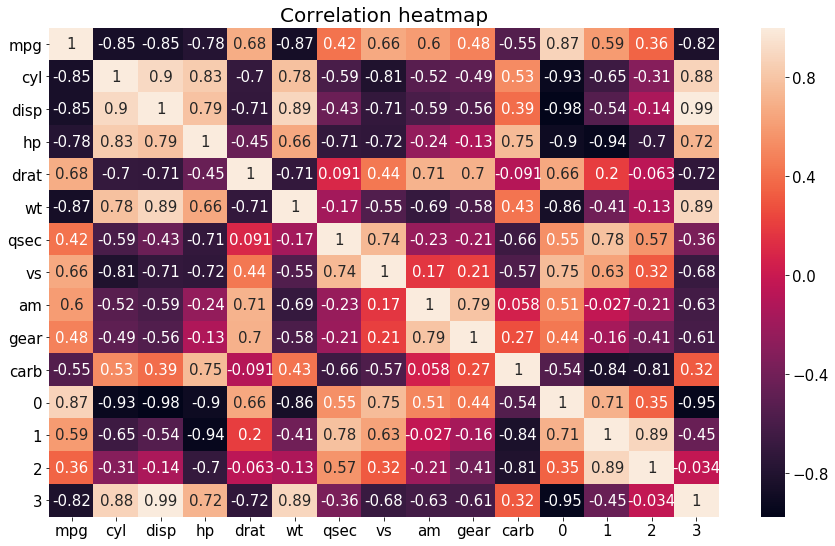

In [17]:
plt.figure(figsize=(15,9))
sns.heatmap(pd.concat([df, df_transformed], axis=1).corr(), annot=True)
plt.title('Correlation heatmap', fontsize=20);


